# Credit Card Fraud Detection

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Import the Dataset

In [2]:
train_df=pd.read_csv('creditcard.csv')
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


 Looks like the PCA dimensionality reduction has been applied to dataset in order to protect the sensitive information in this dataset. 

In [4]:
print(train_df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')>


In [5]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
train_df.shape

(284807, 31)

### Plot the Histogram of Every Feature

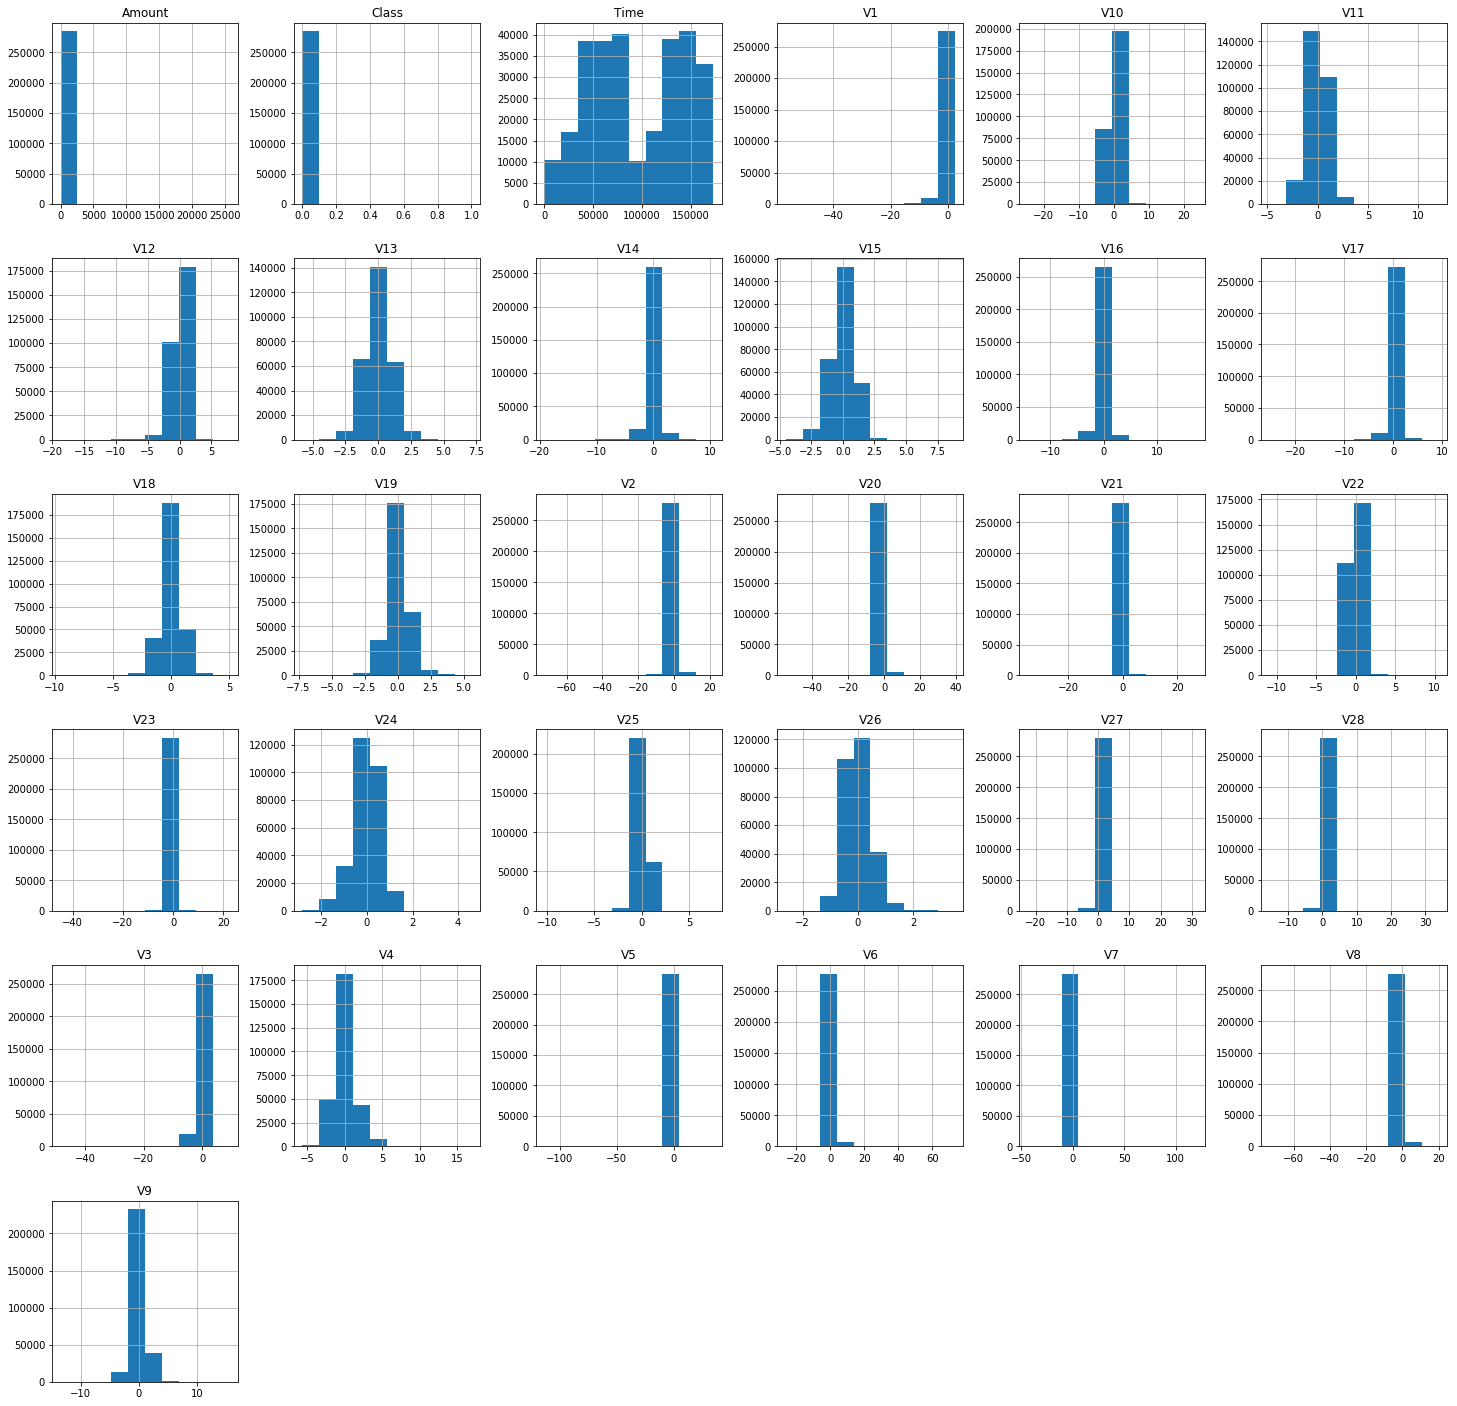

In [7]:
train_df.hist(figsize=(25,25))
plt.show()

Let's find out total number of fraudulent cases out of all the datapoints out there.

In [8]:
fraudulent_train=train_df[train_df['Class']==1]
print("Total Fraud Cases: {}".format(len(fraudulent_train)))
fraudulent_train.shape

Total Fraud Cases: 492


(492, 31)

In [9]:
valid_train=train_df[train_df['Class']==0]
print("Total Valid Cases: {}".format(len(valid_train)))
valid_train.shape

Total Valid Cases: 284315


(284315, 31)

In [10]:
outlier_fraction=len(fraudulent_train)/len(valid_train)
print(outlier_fraction)

0.0017304750013189597


#### There are around 0.17% of total fraudulent cases in the whole dataset. 

### Correlation Matrix

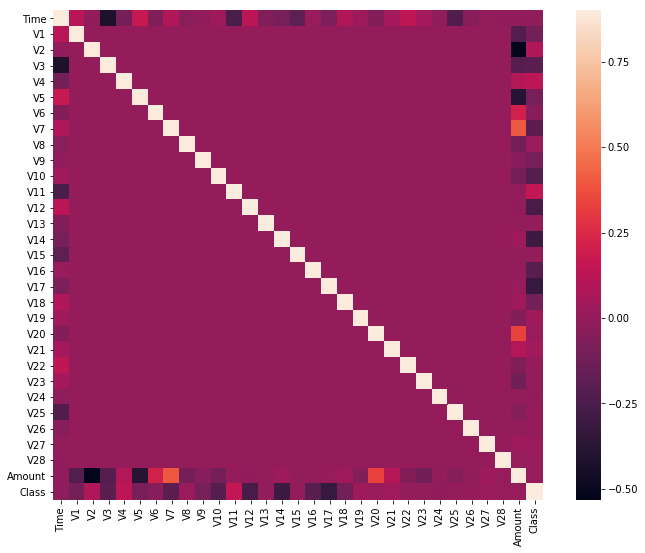

In [11]:
cor_matrix=train_df.corr()
fig=plt.figure(figsize=(12,9))
sb.heatmap(cor_matrix,square=True,vmax=0.9)
plt.show()

### Preparing The Data 

In [12]:
y=train_df['Class']
y.shape

(284807,)

In [14]:
columns=train_df.columns.tolist()
cols=[c for c in columns if c not in ['Class'] ]
X=train_df[cols]
X.shape

(284807, 30)

In [16]:
y.unique()

array([0, 1], dtype=int64)

### Importing Required Models and Libraries

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.25)

In [22]:
model_LOF=LocalOutlierFactor(n_neighbors=15,contamination=outlier_fraction)
model_LOF.fit(X_train,y_train)


LocalOutlierFactor(algorithm='auto', contamination=0.0017304750013189597,
          leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1,
          n_neighbors=15, p=2)

In [24]:
model_IF=IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model_IF.fit(X_train,y_train)

IsolationForest(bootstrap=False, contamination=0.0017304750013189597,
        max_features=1.0, max_samples=213605, n_estimators=100, n_jobs=1,
        random_state=1, verbose=0)

In [35]:
y_predict_LOF=model_LOF.fit_predict(X_test)
y_predict_IF=model_IF.predict(X_test)

y_predict_LOF[y_predict_LOF==1]=0
y_predict_LOF[y_predict_LOF==-1]=1

y_predict_IF[y_predict_IF==1]=0
y_predict_IF[y_predict_IF==-1]=1


errors_LOF=(y_predict_LOF!=y_test).sum()

errors_IF=(y_predict_IF!=y_test).sum()

Local Outlier Factor Errors: 243
Accuracy Score: 0.9965871745175697
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71081
          1       0.01      0.01      0.01       121

avg / total       1.00      1.00      1.00     71202



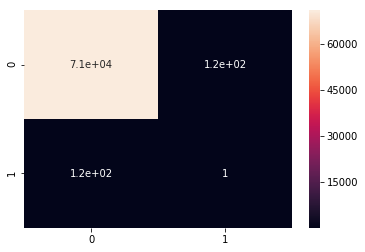

In [42]:
accuracy_LOF = confusion_matrix(y_test,y_predict_LOF)
sb.heatmap(accuracy_LOF,annot=True)
print("Local Outlier Factor Errors: {}".format(errors_LOF))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_predict_LOF)))
print(classification_report(y_test,y_predict_LOF))

Isolation Forest Errors: 158
Accuracy Score: 0.9977809612089548
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71081
          1       0.34      0.33      0.34       121

avg / total       1.00      1.00      1.00     71202



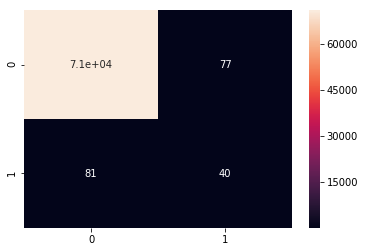

In [43]:
accuracy_IF = confusion_matrix(y_test,y_predict_IF)
sb.heatmap(accuracy_IF,annot=True)
print("Isolation Forest Errors: {}".format(errors_IF))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_predict_IF)))
print(classification_report(y_test,y_predict_IF))